## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the CSV file into pandas dataframe
lin_df = pd.read_csv("cubic_zirconia.csv").drop('Unnamed: 0',axis=1) #drop the unnamed column

In [4]:
# Check top few records to get a feel of the data structure
lin_df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**1.1. Read the data and do exploratory data analysis.**

**Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values).** 

**Perform Univariate and Bivariate Analysis.**

In [5]:
#Check for the description
lin_df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [6]:
#Check for the data types 
lin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
#Check for datatypes**
lin_df.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

In [8]:
#check the shape of the dataset
print('The no. of rows and the no. of columns of the dataset are {} and {} respectively '.format(lin_df.shape[0],lin_df.shape[1]))

The no. of rows and the no. of columns of the dataset are 26967 and 10 respectively 


In [4]:
#Check for missing values
lin_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [109]:
#Check for duplicates
lin_df.duplicated().sum()


34

In [111]:
print('The no. of duplicated records in the dataset is {} '.format(lin_df.duplicated().sum()))

The no. of duplicated records in the dataset is 34 


### After EDA completion, we will drop the duplicates from the whole data and impute the missing values with median for Depth variable.

####  Check for EDA

In [5]:
cat = lin_df.dtypes[lin_df.dtypes=='object'].index
num = lin_df.dtypes[lin_df.dtypes!='object'].index

In [14]:
#Check for the summary of Categorical variabes
#categorical = lin_df.select_dtypes(['object'])
for i in cat:
    print (i)
    print(lin_df[i].value_counts(normalize = True).round(2)*100)
    print("--------------------")

cut
Ideal        40.0
Premium      26.0
Very Good    22.0
Good          9.0
Fair          3.0
Name: cut, dtype: float64
--------------------
color
G    21.0
E    18.0
F    18.0
H    15.0
D    12.0
I    10.0
J     5.0
Name: color, dtype: float64
--------------------
clarity
SI1     24.0
VS2     23.0
SI2     17.0
VS1     15.0
VVS2     9.0
VVS1     7.0
IF       3.0
I1       1.0
Name: clarity, dtype: float64
--------------------


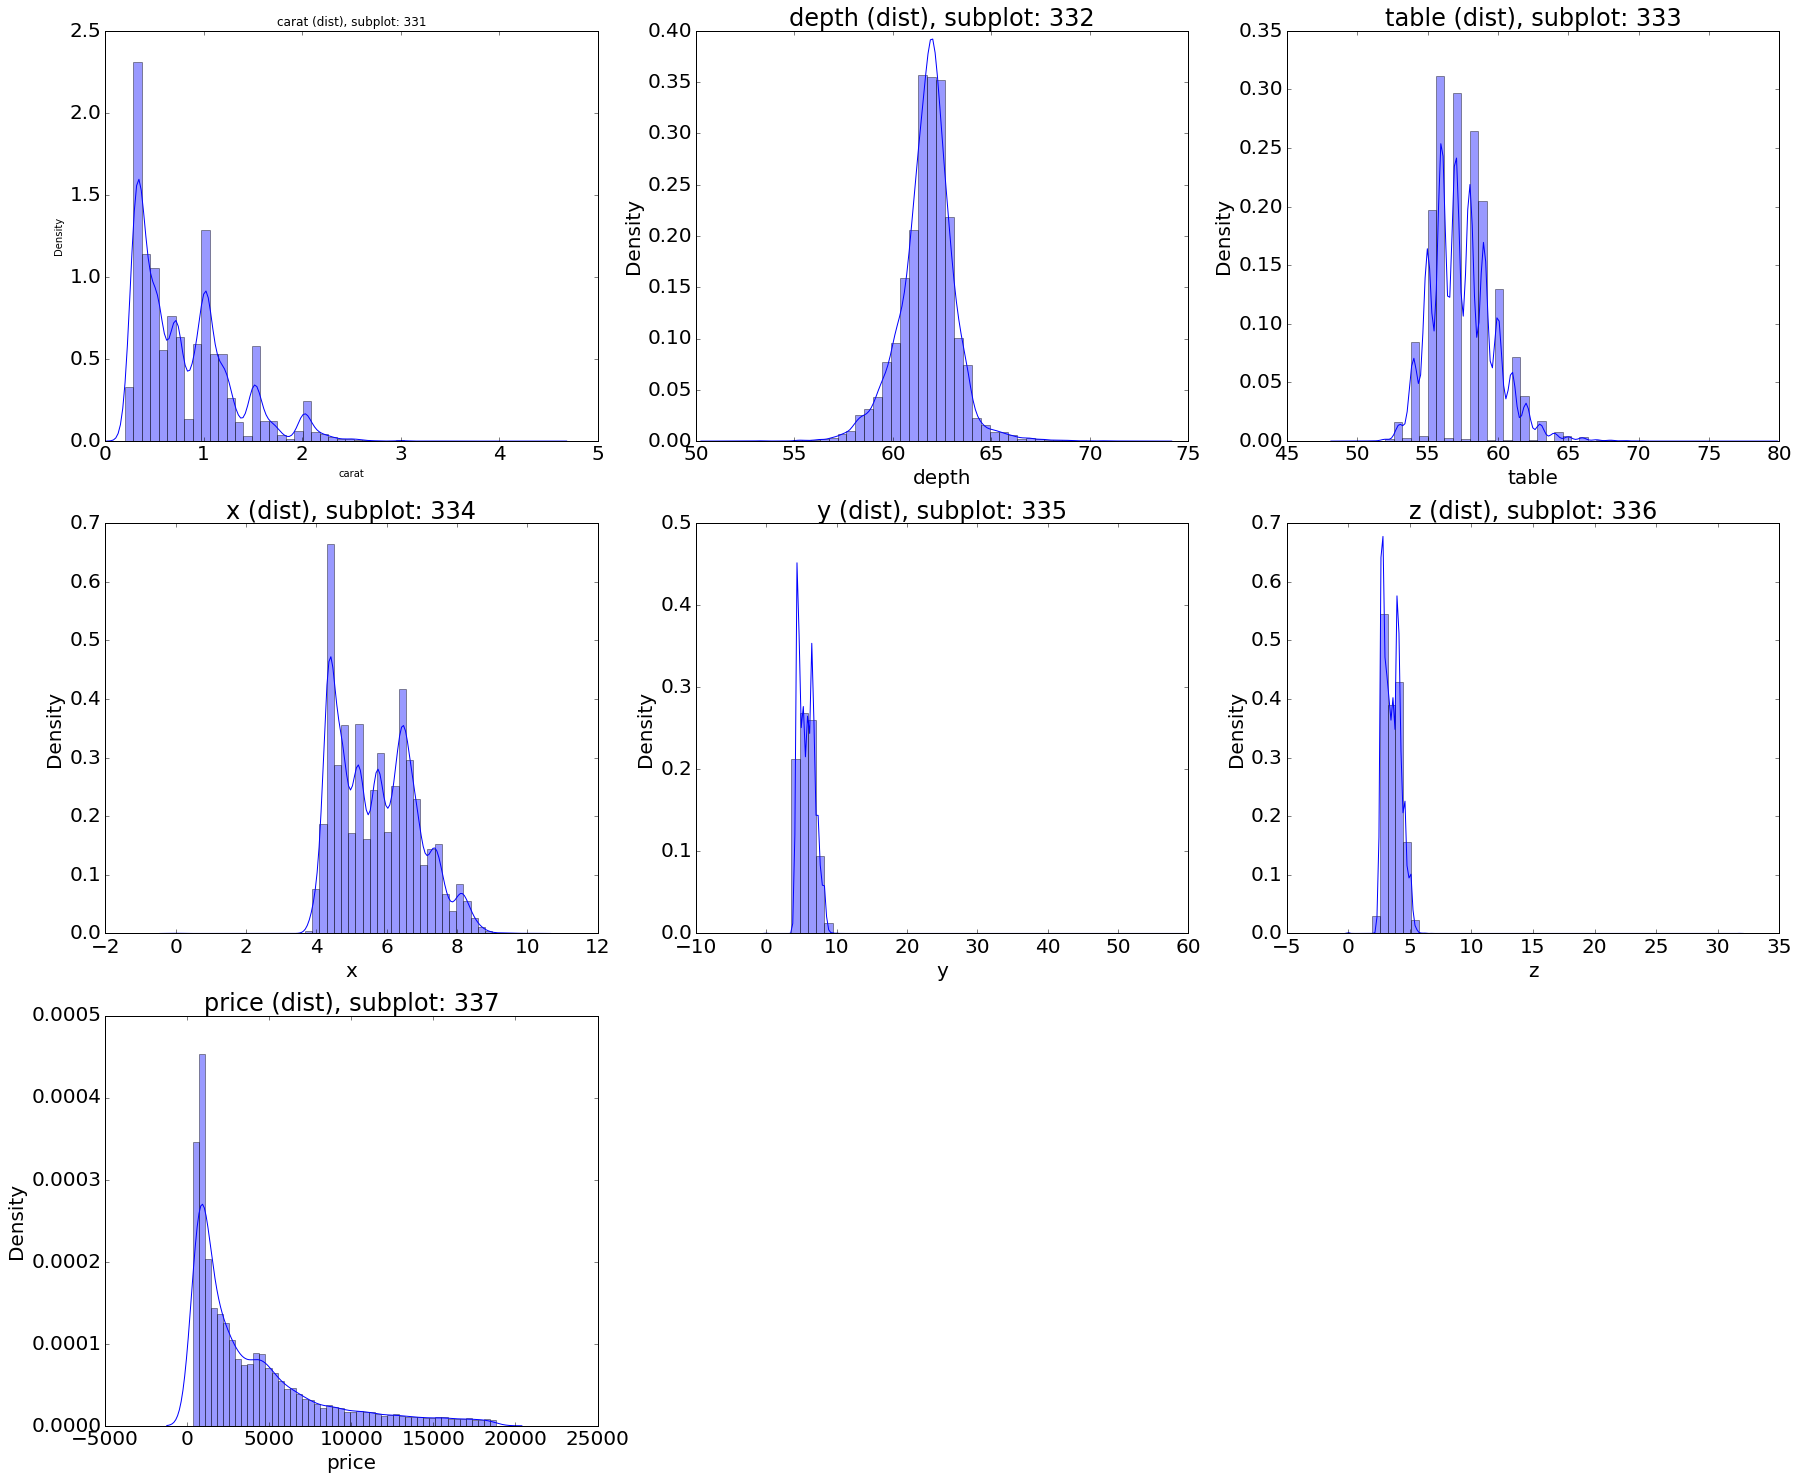

In [12]:
#Check for Distribution plots(histogram)  
fig = plt.figure(figsize=(30,25))
c = 1
for i in num:
    plt.subplot(3, 3, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    sns.distplot(lin_df[i])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    c = c + 1

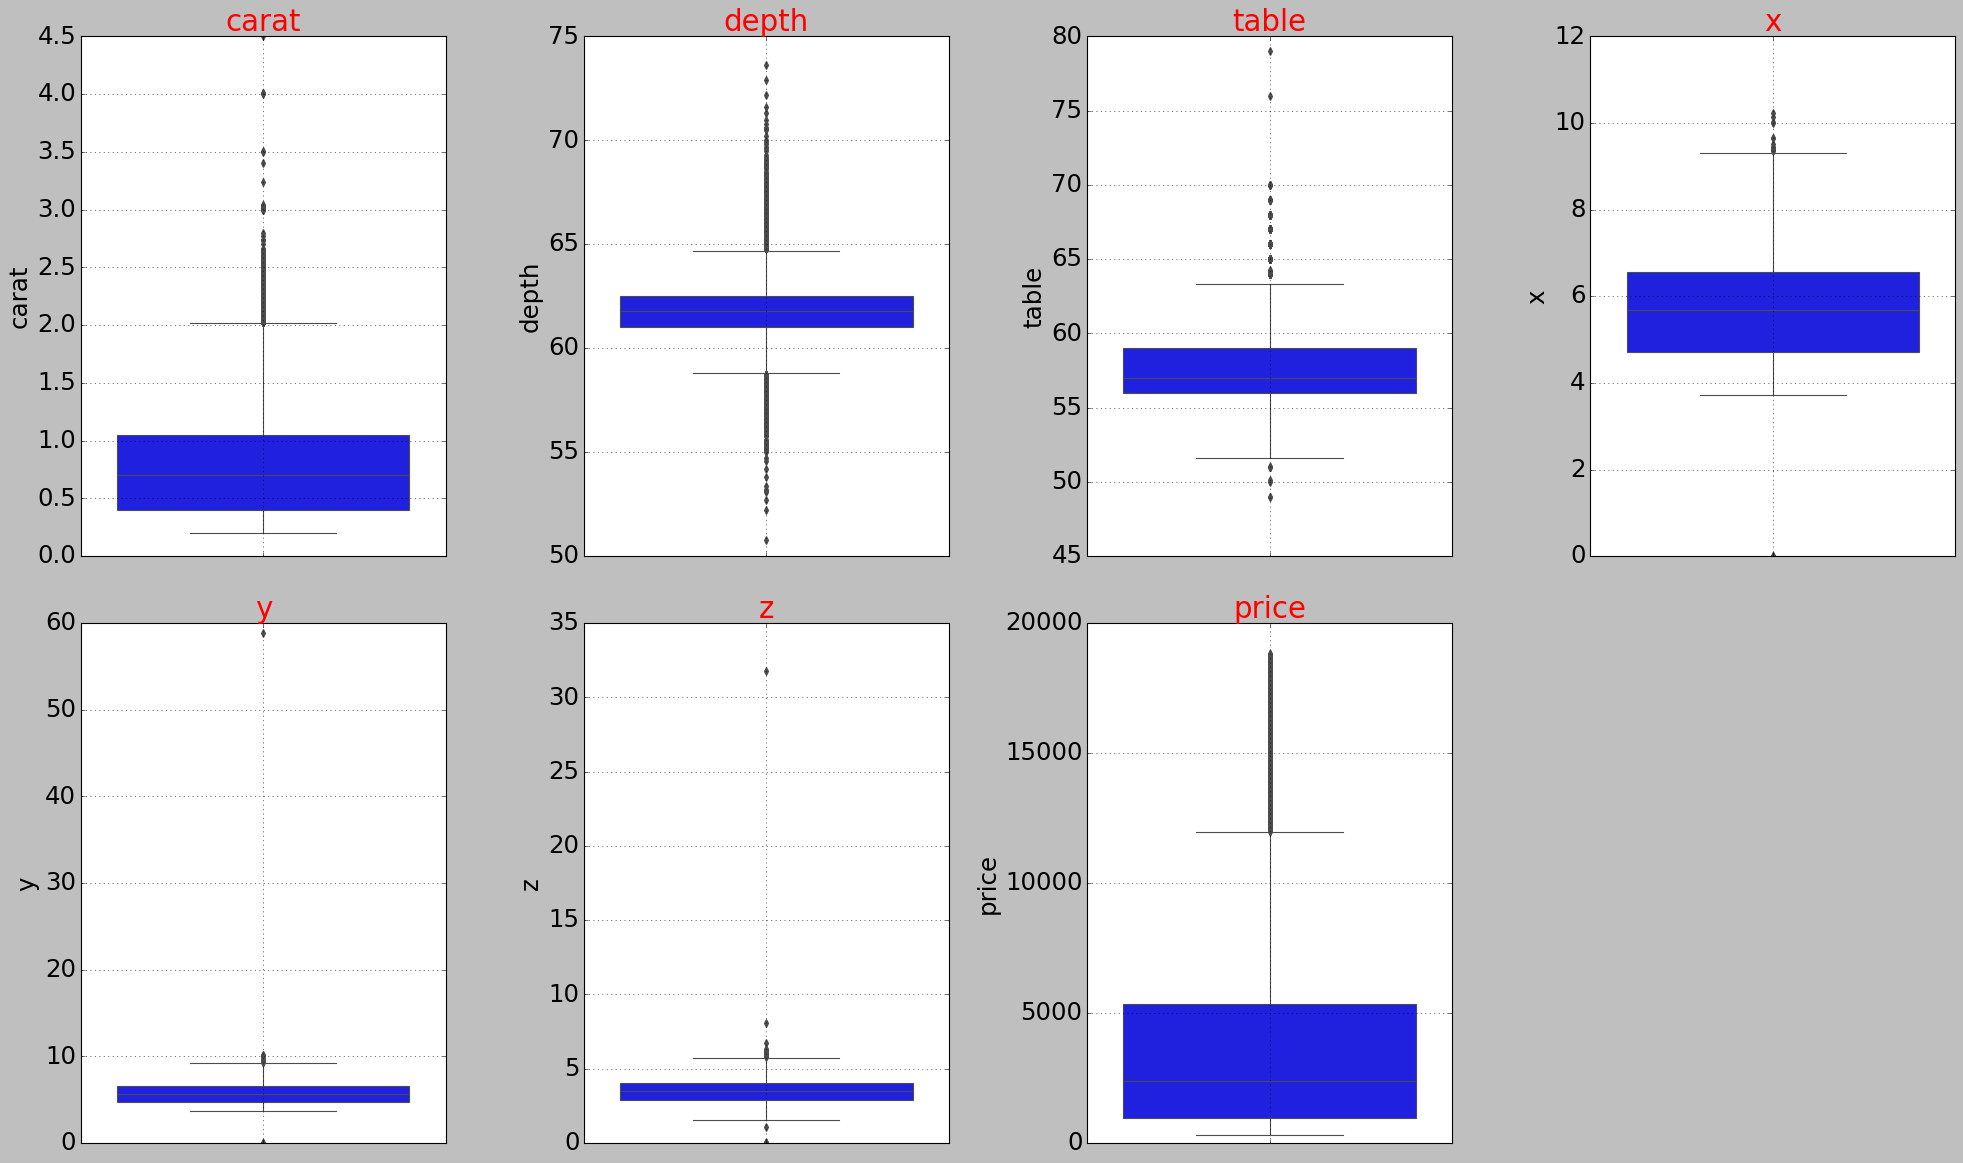

In [30]:
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=lin_df[num]
fig=plt.figure(figsize=(25,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

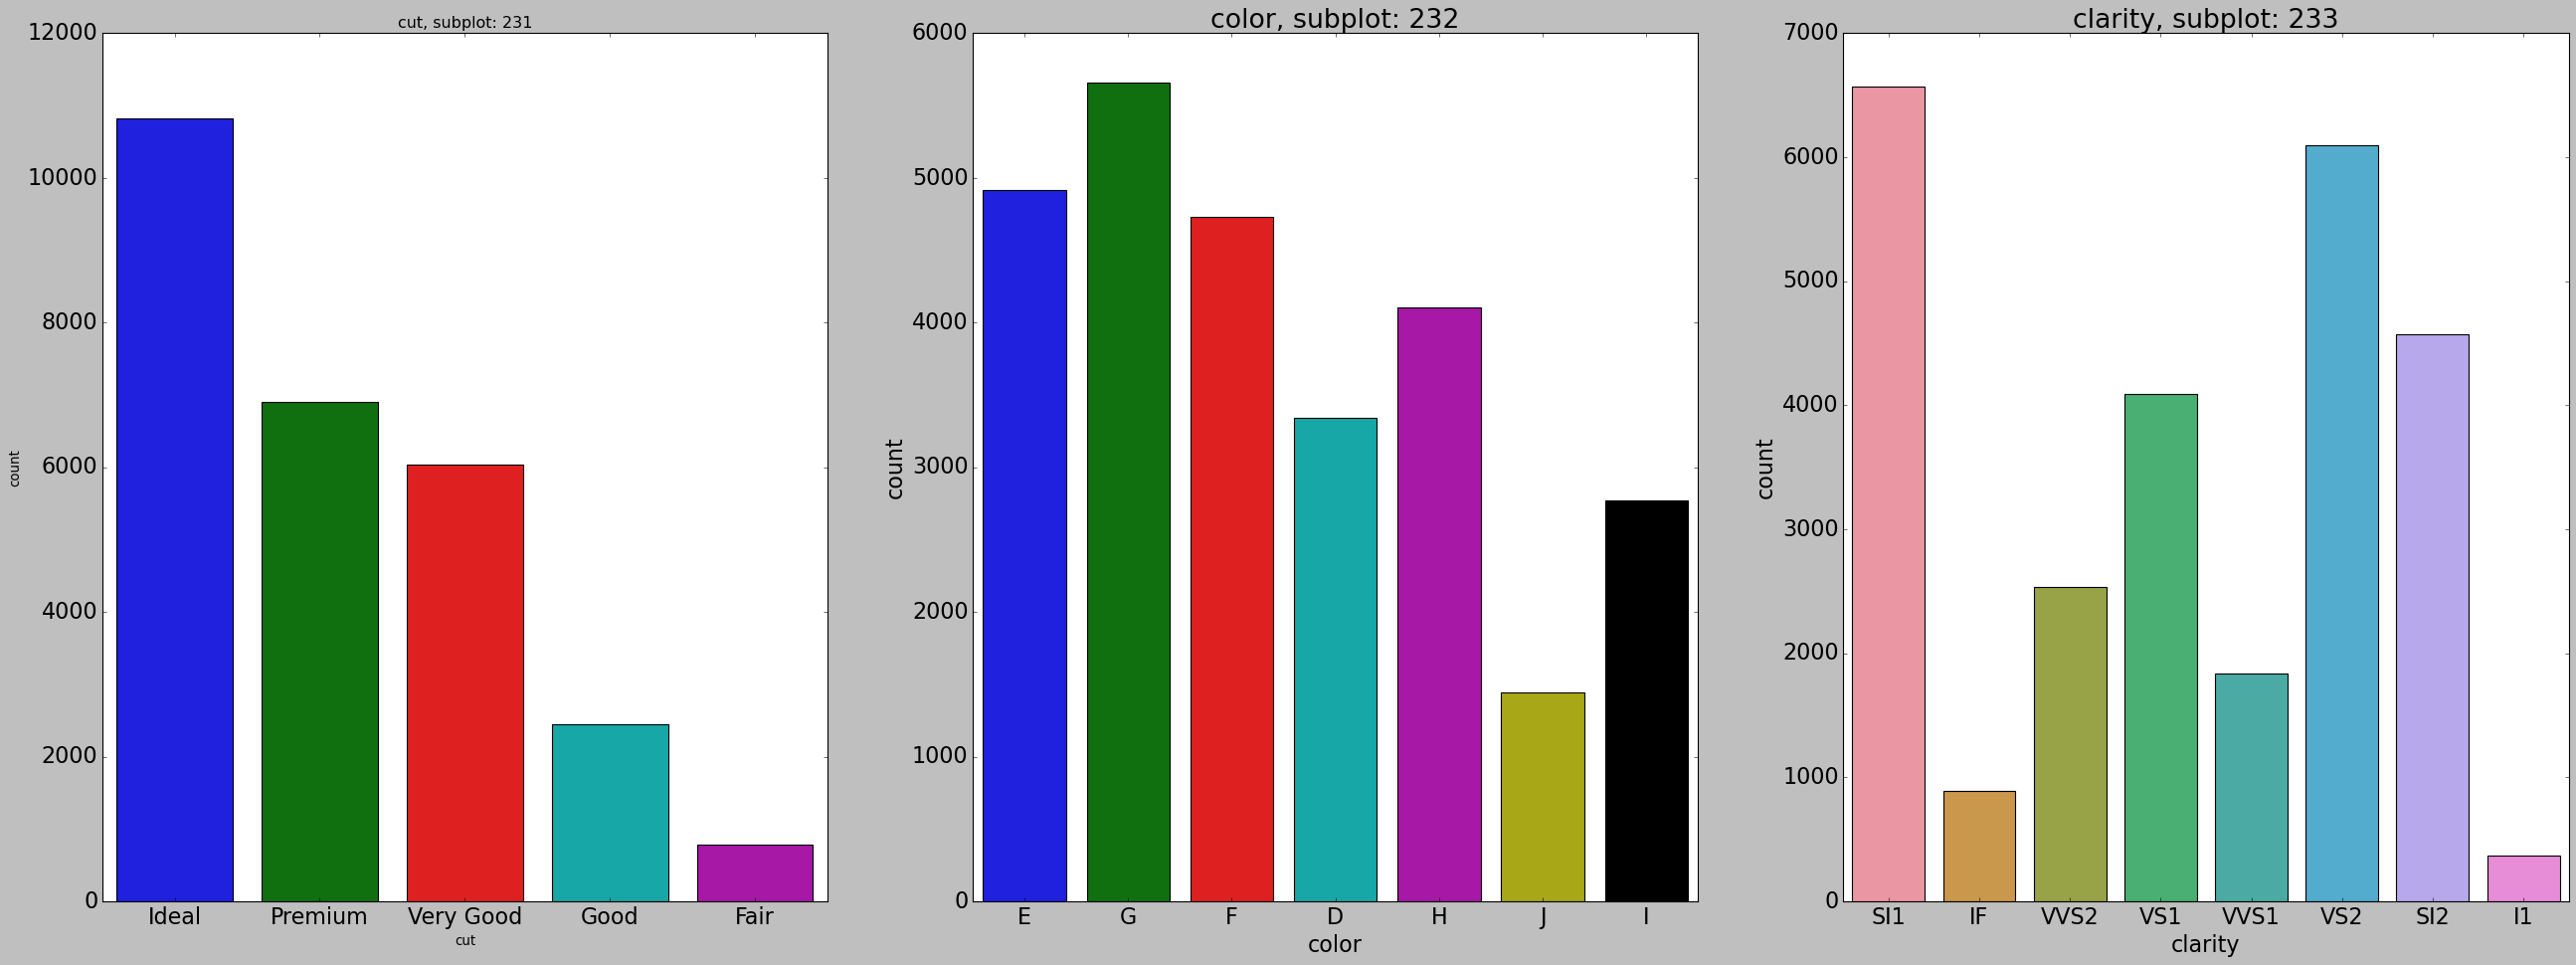

In [5]:
#Check for Count plots(barplots)  
fig = plt.figure(figsize=(40,30))
c = 1
for i in cat:
    plt.subplot(2, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 2, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.countplot(lin_df[i])
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

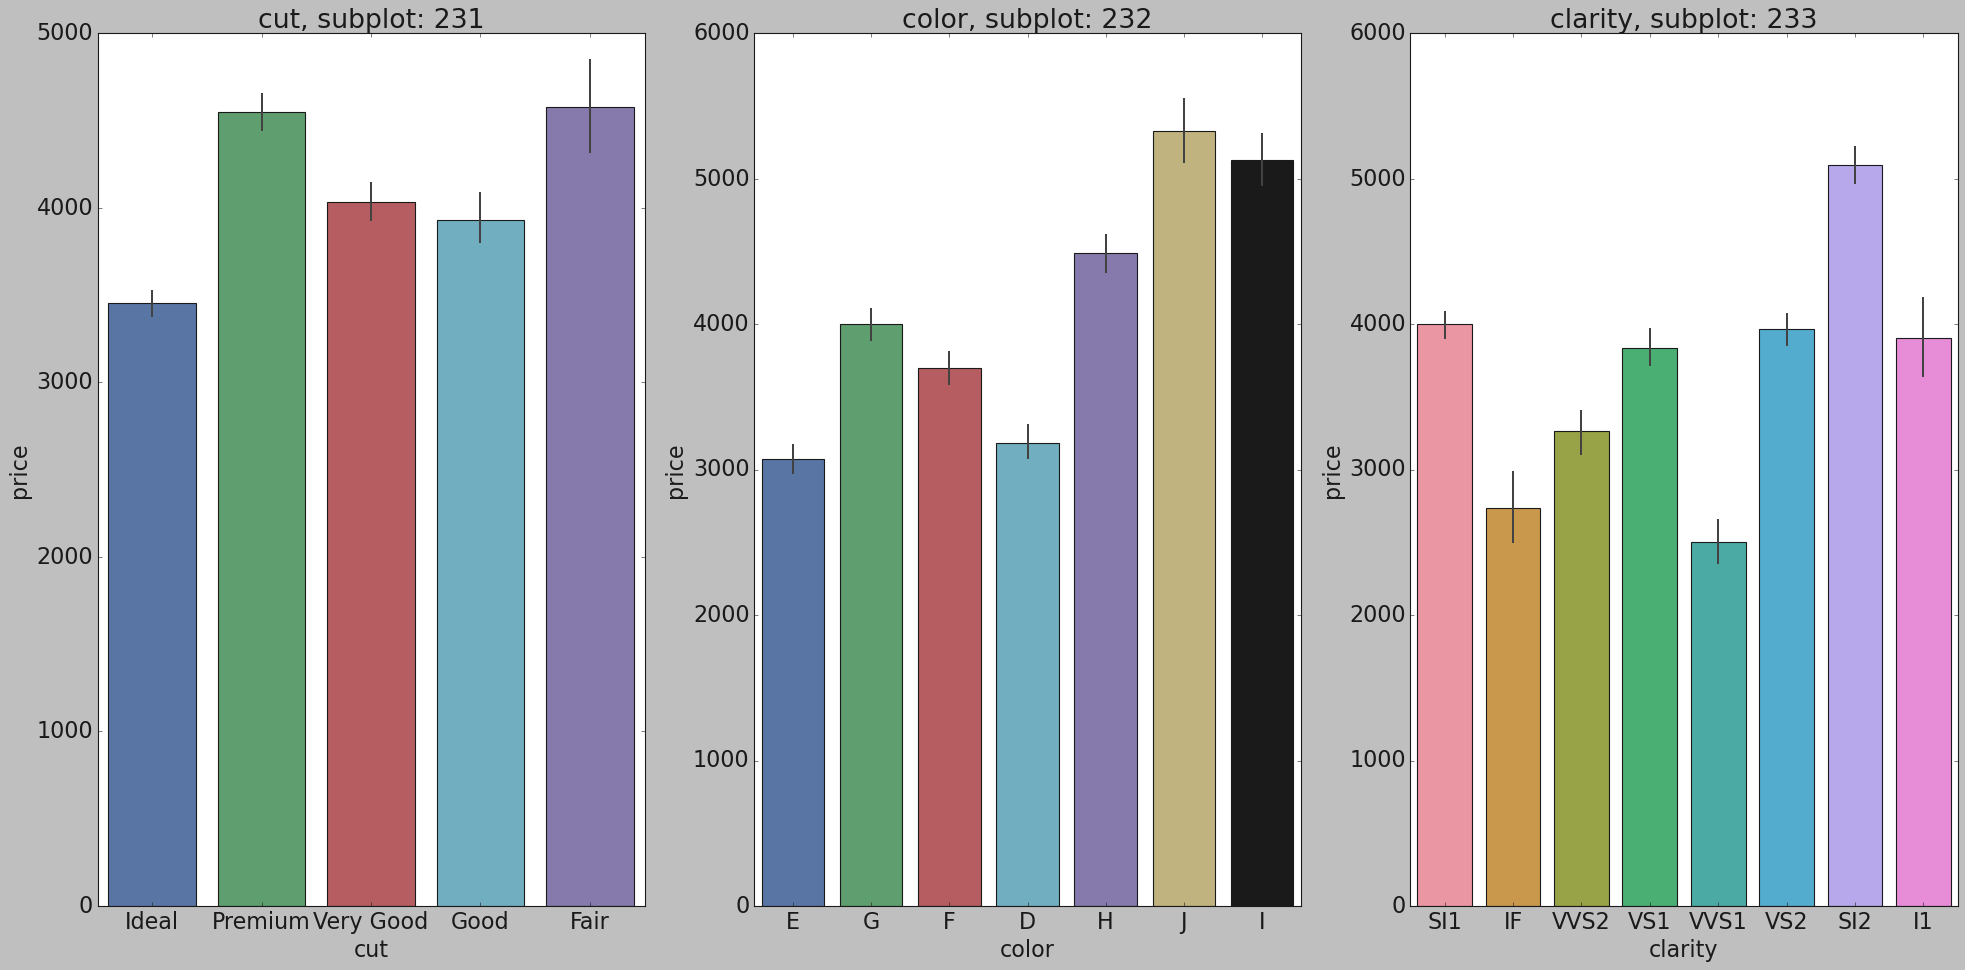

In [114]:
#plt.figure(figsize=(20,15))
#sns.barplot(df.employee_since_years, df.training_marks,hue = df.is_promoted,ci=False)
#plt.show()
fig = plt.figure(figsize=(30,30))
c = 1
for i in cat:
    plt.subplot(2, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 2, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.barplot(lin_df[i],lin_df['price'])
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

<AxesSubplot:>

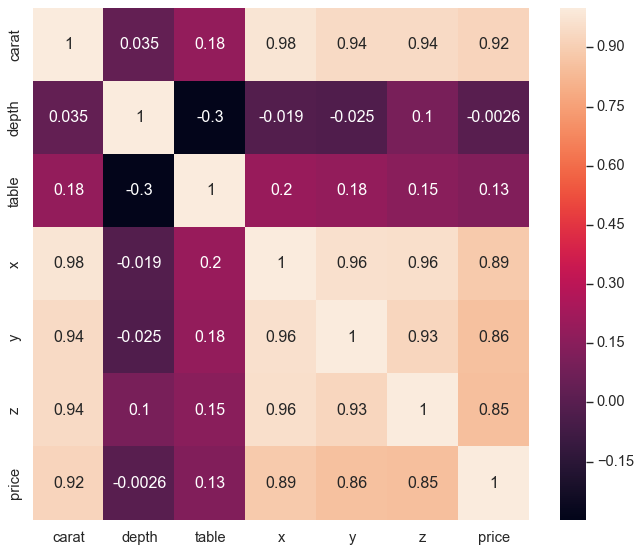

In [9]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(lin_df[num].corr(),annot = True)

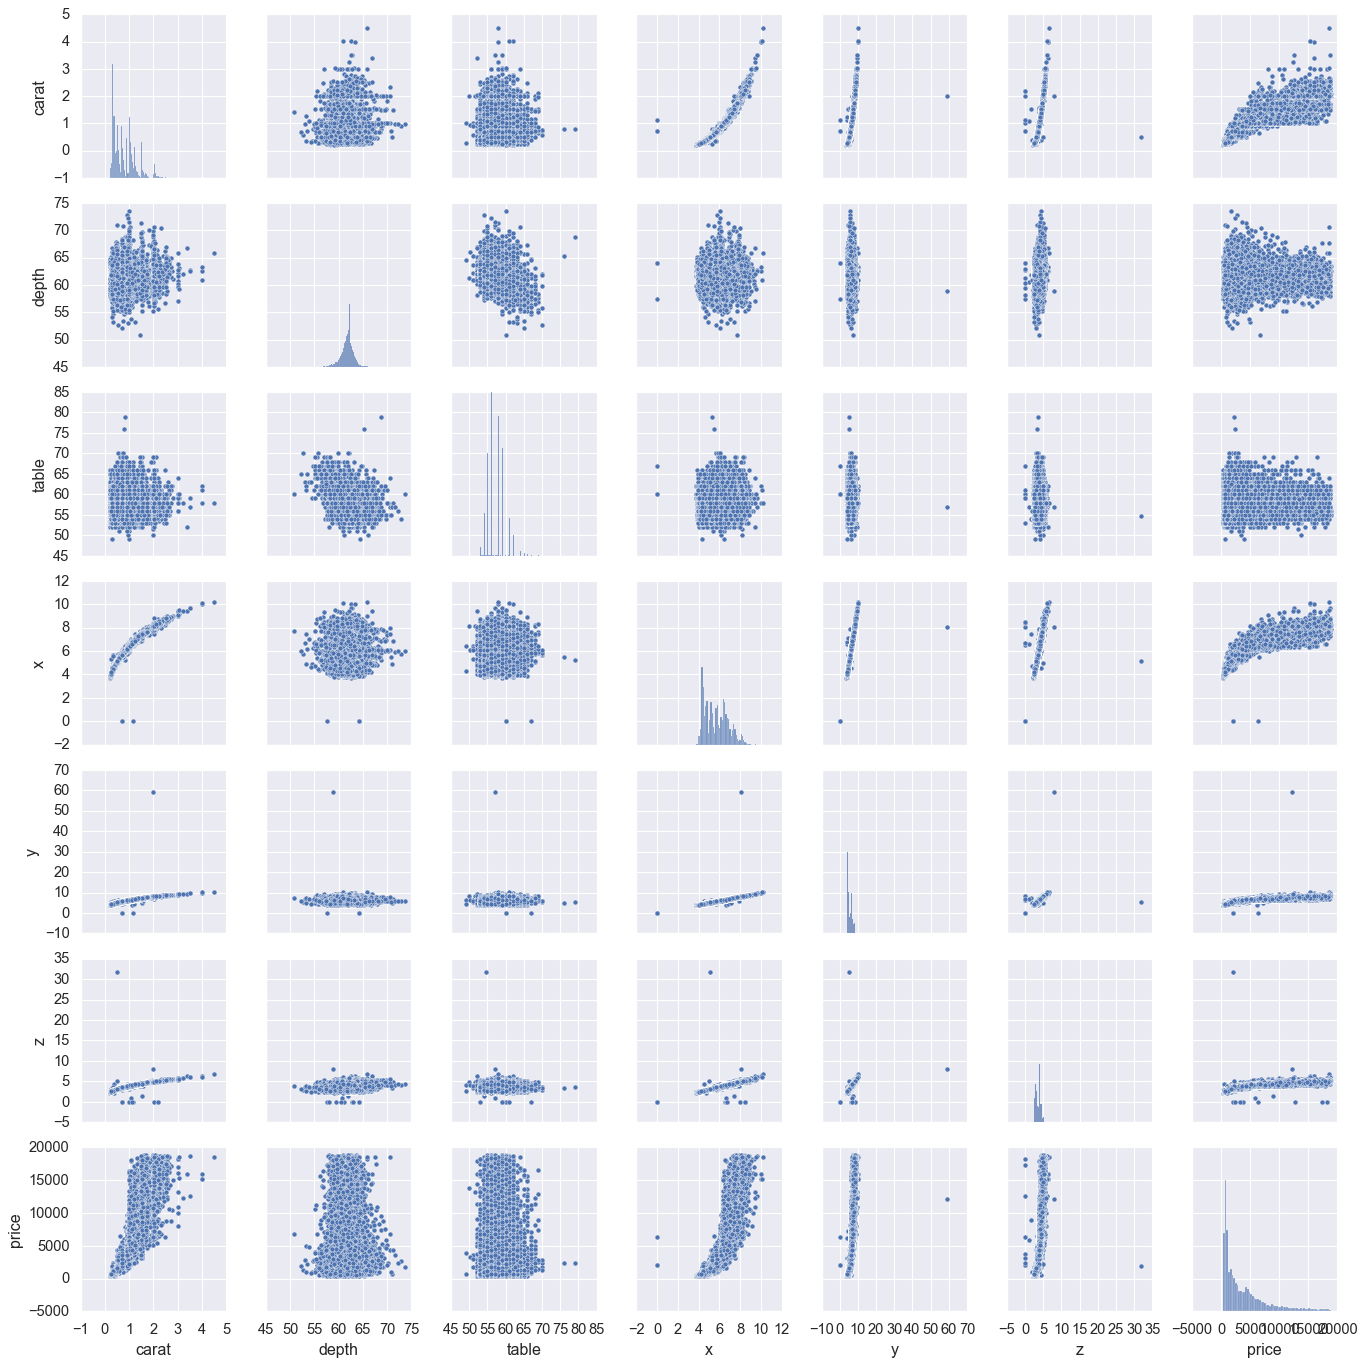

In [36]:
# Check with the pairplots for bi variate data
sns.pairplot(lin_df,diag_kind='hist')
plt.show()

In [6]:
#Bi variate analysis for Categorical variables
clarity_color_table = pd.crosstab(index=lin_df["clarity"], 
                          columns=lin_df["color"])

clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,25,54,67,68,82,48,21
IF,38,87,183,342,149,69,26
SI1,1040,1249,1088,1001,1082,725,386
SI2,671,849,753,779,796,469,258
VS1,369,625,672,1078,595,480,274
VS2,804,1202,1107,1205,804,603,374
VVS1,121,342,360,507,288,183,38
VVS2,276,509,499,681,306,194,66


<AxesSubplot:xlabel='clarity'>

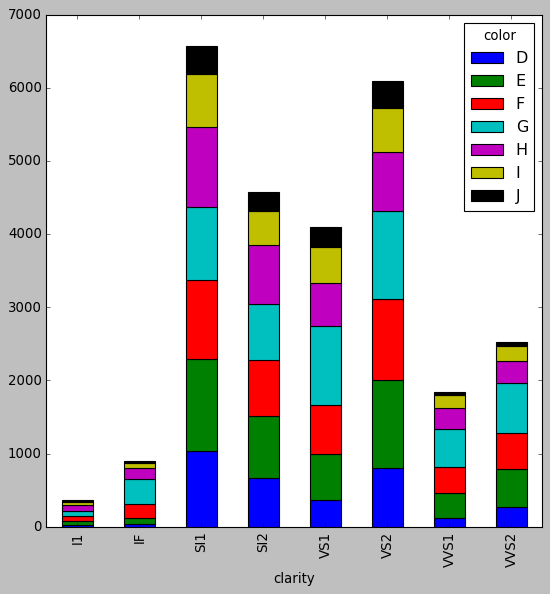

In [7]:
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [8]:
cut_color_table = pd.crosstab(index=lin_df["cut"], 
                          columns=lin_df["color"])

cut_color_table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


<AxesSubplot:xlabel='cut'>

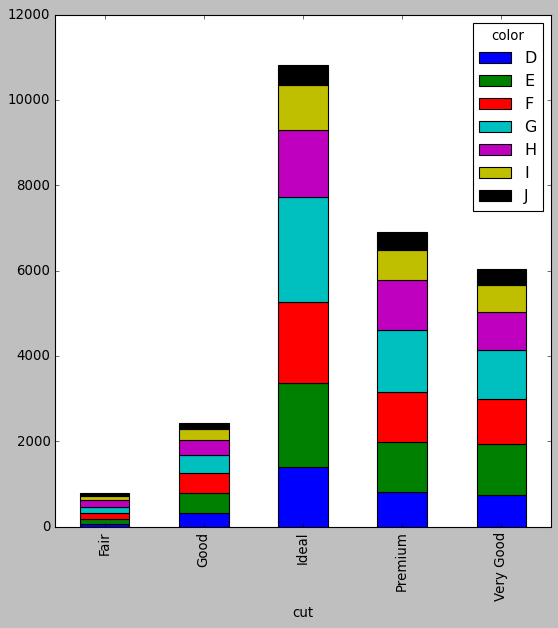

In [9]:
cut_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [10]:
cut_clarity_table = pd.crosstab(index=lin_df["cut"], 
                          columns=lin_df["clarity"])

cut_clarity_table

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


<AxesSubplot:xlabel='cut'>

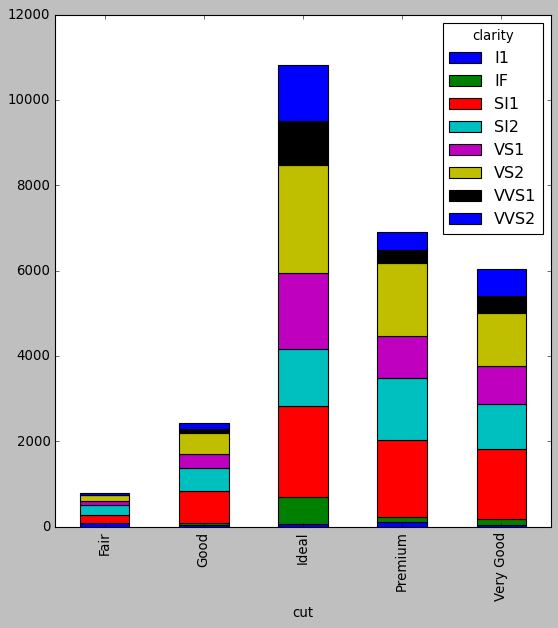

In [11]:
cut_clarity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [39]:
lin_df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


**1.2 Impute null values if present, also check for the values which are equal to zero.**

**Do they have any meaning or do we need to change them or drop them?**

**Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.**

In [ ]:
#check the missing values
lin_df.isnull().sum()

In [119]:
#Replace the missing values with median of that attribute
lin_df['depth'] = lin_df['depth'].fillna(lin_df['depth'].median())

In [120]:
lin_df.isnull().sum()
#we are not dropping the missing values instead we have replaced them with the median of that numerical variable.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
#Drop the duplicates
lin_df = lin_df.drop_duplicates()
#we have dropped the duplicates

In [13]:
lin_df.duplicated().sum()

0

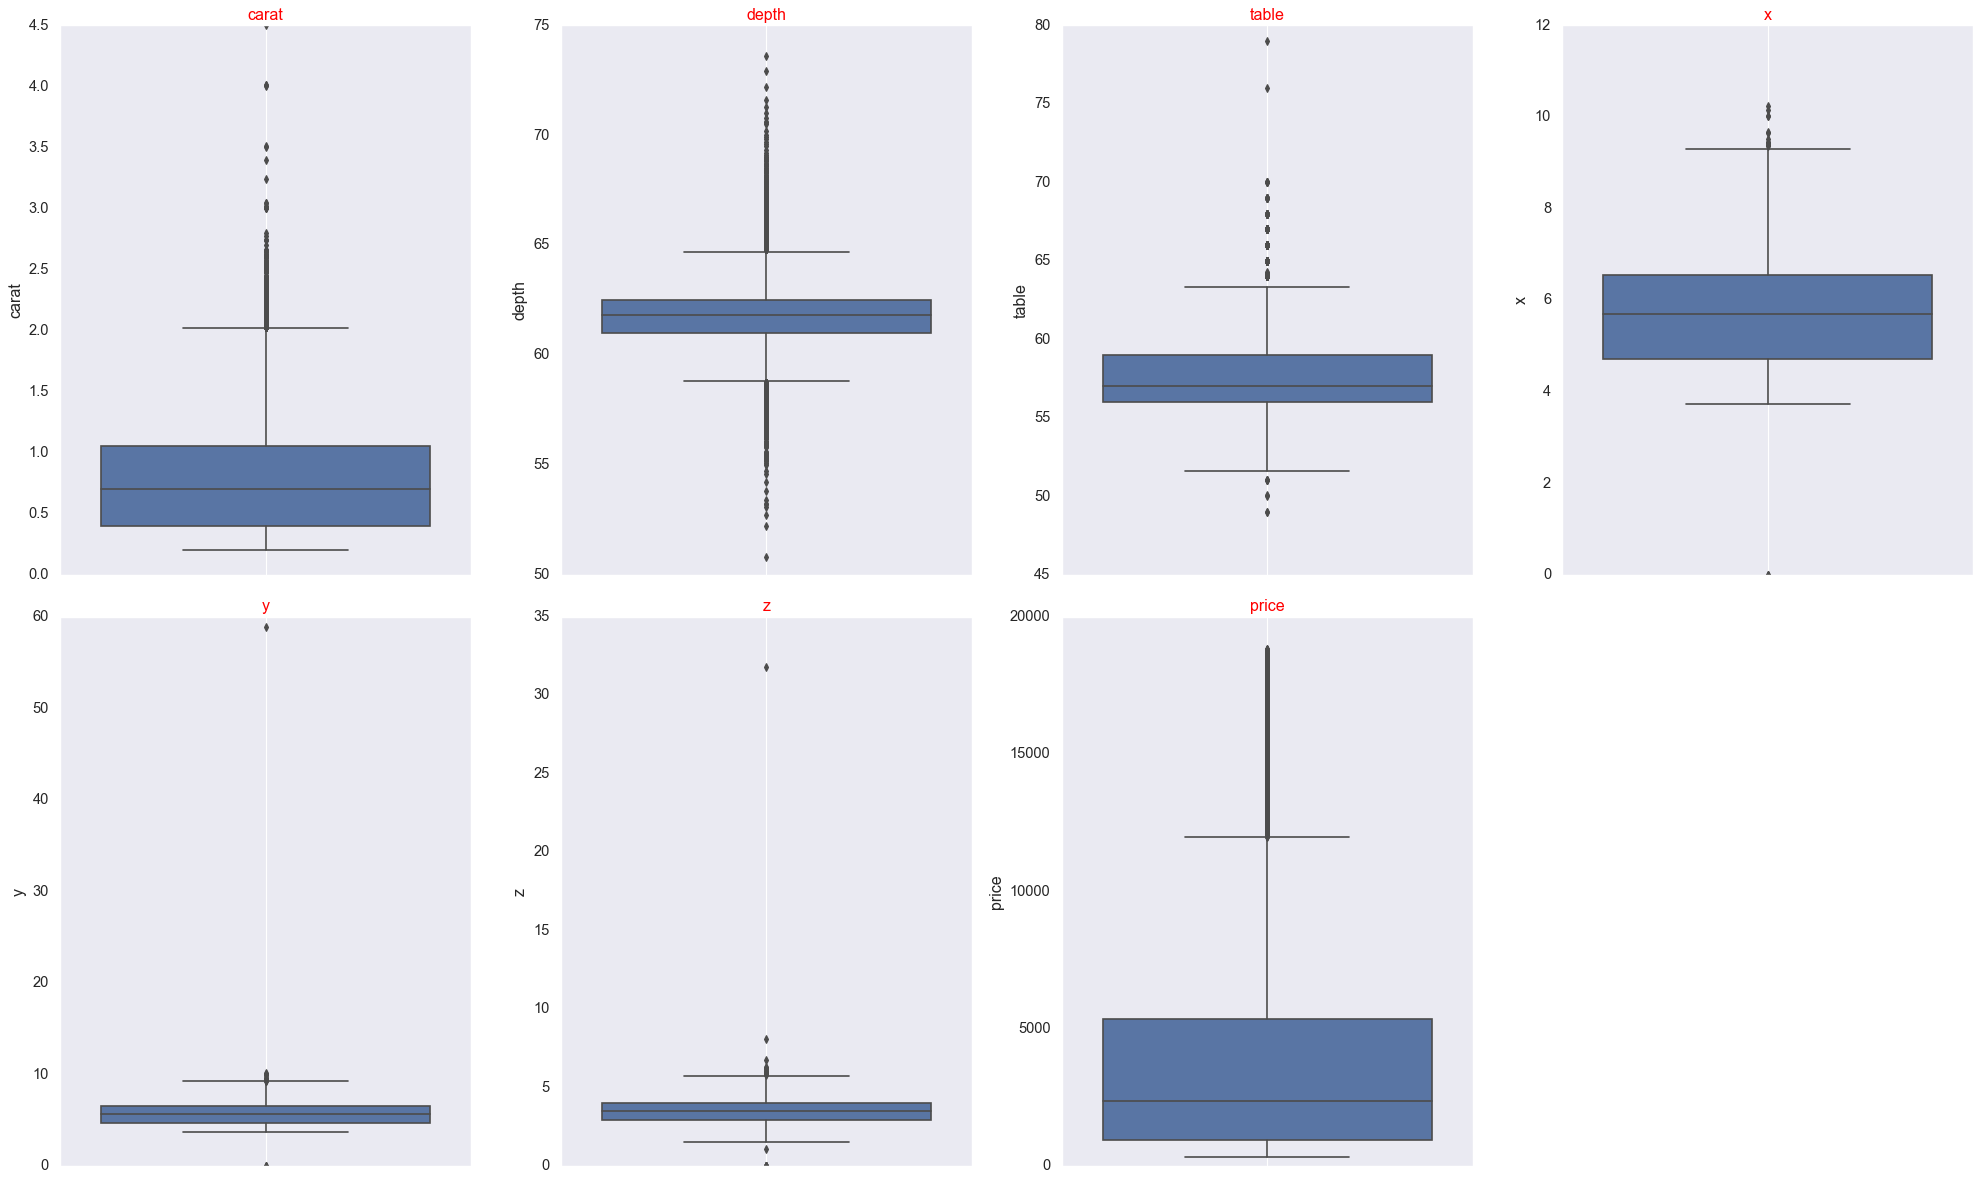

In [29]:
#check for the outliers
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=lin_df[num]
fig=plt.figure(figsize=(25,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

In [14]:
#make a copy
df=lin_df.copy(deep = True)

In [122]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [15]:
#remve the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    col = np.where(col >= upper_range, upper_range, col)
    col = np.where(col <= lower_range, lower_range, col)
    return col

In [150]:
df['carat'] = remove_outlier(df['carat'])
df['depth'] = remove_outlier(df['depth'])
df['table'] = remove_outlier(df['table'])
df['x'] = remove_outlier(df['x'])
df['y'] = remove_outlier(df['y'])
df['z'] = remove_outlier(df['z'])

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [61]:
num1 = df.dtypes[df.dtypes!='object'].index

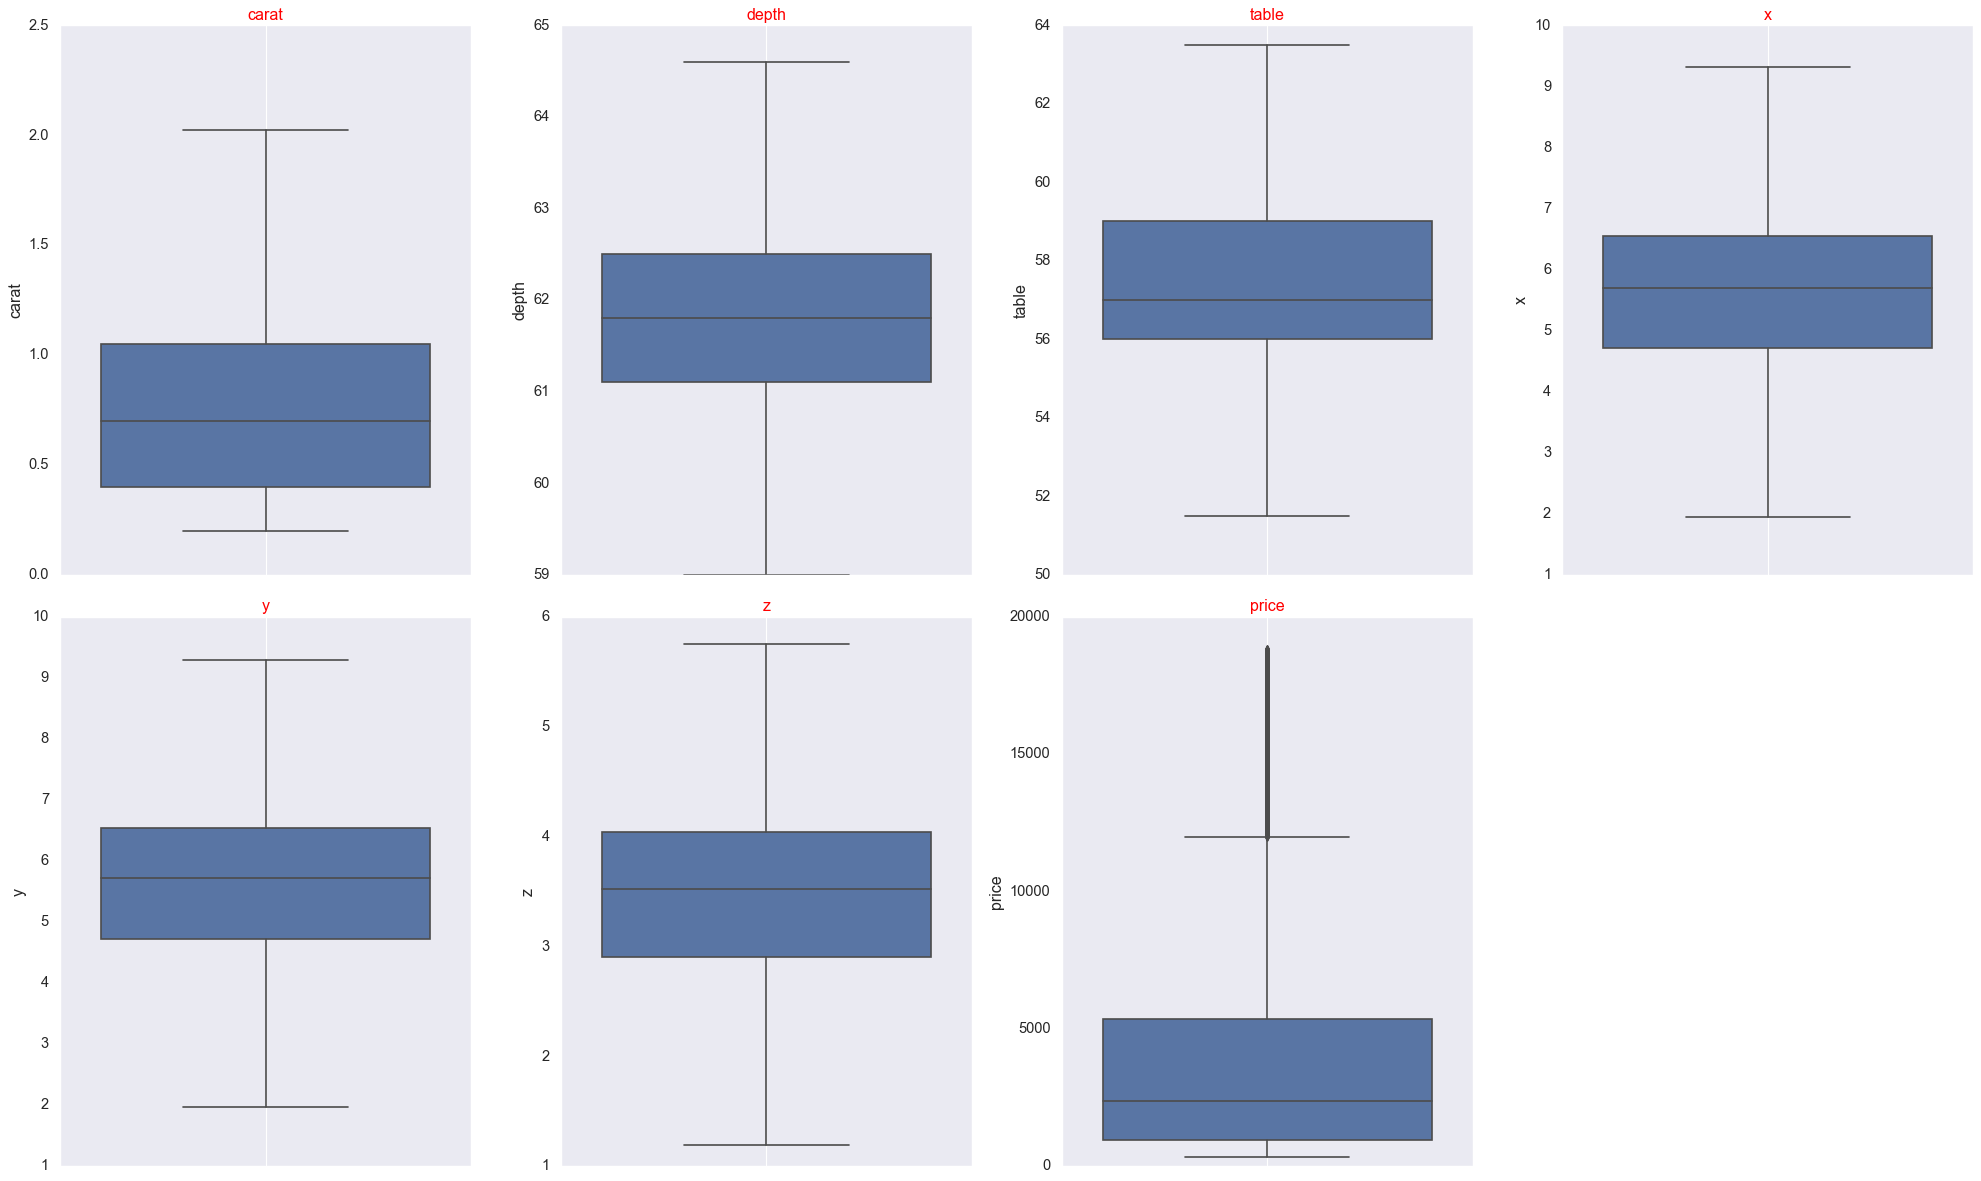

In [62]:
#check for the outliers
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=df[num1]
fig=plt.figure(figsize=(25,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

In [63]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

**1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30).**

**Apply Linear regression using scikit learn.** 

**Perform checks for significant variables using appropriate method from statsmodel.** 

**Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare.** 

**Compare these models and select the best one with appropriate reasoning.**

In [55]:
#**Convert Object datatypes to categorical** using encoding
#for i in lin_df.columns:
#    if lin_df[i].dtype == 'object':
#        lin_df[i]= pd.Categorical(lin_df[i]).codes

In [14]:
#number of unique values
df['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [15]:
df['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [22]:
df['clarity'].value_counts()

3    6565
4    6093
2    4564
5    4087
6    2530
7    1839
8     891
1     364
Name: clarity, dtype: int64

In [17]:
#**Convert Object datatypes to categorical** using encoding
df['cut']= df['cut'].map({'Ideal': 1, 'Premium': 2, 'Very Good':3, 'Good':4, 'Fair':5})
df['color']= df['color'].map({'J': 1, 'I': 2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7})
df['clarity']= df['clarity'].map({'I1': 1, 'SI2': 2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,6,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,1,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,1,5,7,60.4,59.0,4.35,4.43,2.65,779


<AxesSubplot:>

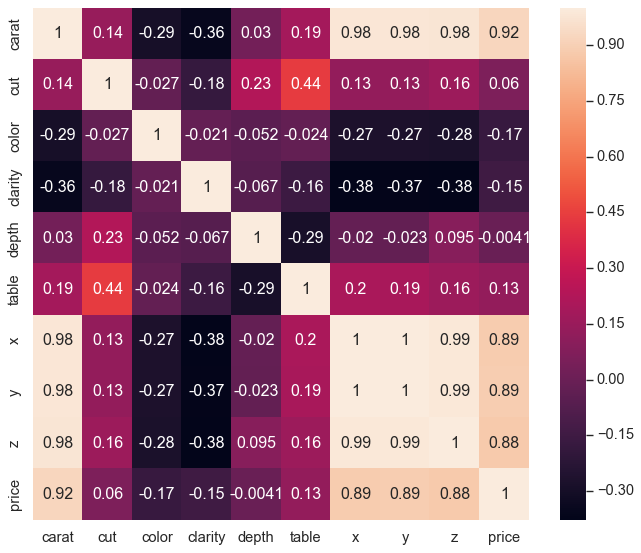

In [65]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot = True)

In [19]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop('price', axis=1)
# Copy the 'price' column alone into the y dataframe. This is the dependent variable
Y = df[['price']]

In [20]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

In [21]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [135]:
print('The shape of the training records in the dataseti.e., X_train and Y_train are {} and {} '.format(X_train.shape,Y_train.shape))

The shape of the training records in the dataseti.e., X_train and Y_train are (18853, 9) and (18853, 1) 


In [136]:
print('The shape of the training records in the dataseti.e., X_test and Y_test are {} and {} '.format(X_test.shape,Y_test.shape))

The shape of the training records in the dataseti.e., X_test and Y_test are (8080, 9) and (8080, 1) 


In [24]:
#import the standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [25]:
#Scale the overall X_train data- to avoid data leakage-using fit_transform
num_col = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_train[num_col] = SS.fit_transform(X_train[num_col])
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
22114,-0.962965,3,3,4,0.468953,1.142579,-1.174815,-1.096292,-1.071628
2275,-1.047213,1,6,4,-0.387552,-1.097500,-1.228241,-1.206439,-1.223089
19183,-0.625974,1,4,3,0.540328,-0.201468,-0.569316,-0.579446,-0.507095
5030,0.637744,4,6,2,1.111331,-0.649484,0.712916,0.716904,0.842276
25414,0.469249,2,5,2,-0.458927,2.038611,0.721821,0.640648,0.608202


In [26]:
#Scale the overall X_test data- to avoid data leakage-using transform
X_test[num_col] = SS.transform(X_test[num_col])
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
16997,0.974736,2,2,3,-0.887180,2.038611,1.104709,1.004982,0.911122
24457,0.216505,3,4,4,-2.314688,0.694563,0.552637,0.530501,0.250205
16612,1.206417,1,5,5,-1.529558,-0.201468,1.380746,1.259168,1.076351
308,0.090133,4,4,5,1.325457,-0.201468,0.223175,0.166167,0.346589
26652,2.533322,3,1,4,-0.673054,2.038611,2.102001,2.021727,1.916266


In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

In [161]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 6225.126363155919
The coefficient for cut is -135.11515745127866
The coefficient for color is 333.2593052881319
The coefficient for clarity is 485.1157936780361
The coefficient for depth is -60.48906904693782
The coefficient for table is -58.32168104595592
The coefficient for x is -2902.0273863367165
The coefficient for y is 1455.153697656778
The coefficient for z is -639.976162590739


In [162]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 782.8270391279461


In [163]:
#Check the model score for training set
regression_model.score(X_train, Y_train)

0.9160043267788675

In [164]:
#Check the model score for test set
regression_model.score(X_test, Y_test)

0.9180929919842764

In [175]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [176]:
#Rmse for train data
Y_pred_train= regression_model.fit(X_train,Y_train).predict(X_train)
rms = sqrt(mean_squared_error(Y_train, Y_pred_train))
rms

1162.0212712866878

In [177]:
MSE = np.square(np.subtract(Y_train, Y_pred_train)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1162.0212712866896


In [ ]:
rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [165]:
#RMSE on the training data
Y_pred_train= regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(mean_squared_error(Y_train, Y_pred_train,squared=False))

34.08843310107826

In [166]:
#RMSE on the test data
Y_pred_test= regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(mean_squared_error(Y_test, Y_pred_test,squared=False))

34.05661572105686

In [167]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS


In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [169]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)

In [104]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [170]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe col

In [171]:
featureScores

,Specs,Score
0,carat,7056.207164
1,cut,6561.054887
2,color,8663.270312
3,clarity,9628.580592
4,depth,238.880922
5,table,812.596478
6,x,5808.113410
7,y,5728.411942
8,z,3577.946284


In [172]:
print(featureScores.nlargest(5,'Score'))

     Specs        Score
3  clarity  9628.580592
2    color  8663.270312
0    carat  7056.207164
1      cut  6561.054887
6        x  5808.113410


In [31]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [77]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.828710,1,2,6,0.448223,-0.669095,-0.851279,-0.895171,-0.827069,1061
9728,1.983254,1,1,3,0.857607,-0.204361,1.643548,1.626182,1.740161,6320
1936,-1.001754,4,5,3,0.038839,2.119307,-1.179779,-1.145518,-1.142594,536
26220,-0.201426,3,3,3,0.857607,-0.204361,-0.105494,-0.063661,0.004771,2214
18445,-0.201426,1,7,2,0.284469,-0.669095,-0.052224,-0.018956,-0.009571,2575


In [78]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = df).fit()
lm1.params

Intercept     5790.798608
carat        13487.316616
cut           -136.818700
color          326.714610
clarity        479.839059
depth          -56.918953
table          -28.264847
x            -2636.082659
y             1341.088953
z             -874.478700
dtype: float64

In [79]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.284e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:05:55   Log-Likelihood:            -2.2863e+05
No. Observations:               26967   AIC:                         4.573e+05
Df Residuals:                   26957   BIC:                         4.574e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5790.7986    740.308      7.822      0.0

In [80]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-Y_test)**2)
mse

price    1.392553e+06
dtype: float64

In [81]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

1180.0646756835004

In [82]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, Y_test)

0.9143361822722578

In [83]:
# predict mileage (mpg) for a set of attributes not in the training or test set
Y_pred = regression_model.predict(X_test)

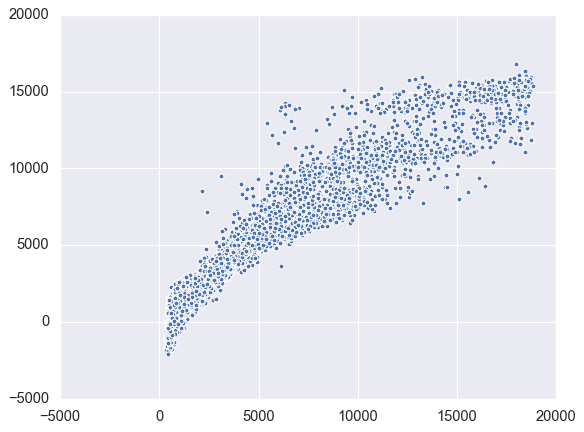

In [84]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(Y_test['price'], Y_pred)

In [41]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [42]:
# How do we improve the model? the R^2 is .887, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [22]:
from scipy.stats import zscore
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
Y_train_scaled = Y_train.apply(zscore)
Y_test_scaled = Y_test.apply(zscore)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, Y_train_scaled)

In [79]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3422705721189805
The coefficient for cut is 0.015549714966830688
The coefficient for color is -0.11996223558605391
The coefficient for clarity is 0.12510569481767453
The coefficient for depth is -0.052972318747220005
The coefficient for table is -0.05178462242387369
The coefficient for x is -0.3523521372355106
The coefficient for y is 0.0012902720256735554
The coefficient for z is -0.005522837860705407


In [80]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.6628441949479677e-16


In [81]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_test_scaled, Y_test_scaled)

0.8891346828253487

In [83]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases
mse = np.mean((regression_model.predict(X_test_scaled)-Y_test_scaled)**2)
mse

price    0.110865
dtype: float64

In [84]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3329644383033289

In [85]:
# predict mileage (mpg) for a set of attributes not in the training or test set
Y_pred = regression_model.predict(X_test_scaled)

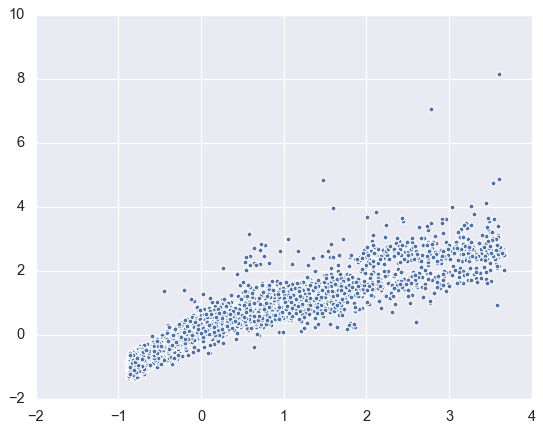

In [87]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(Y_test_scaled['price'], Y_pred)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [87]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 111.36554123991198
cut ---> 5.873935270422806
color ---> 8.524793593351902
clarity ---> 8.589752767629266
depth ---> 895.1125581856417
table ---> 777.6901226126648
x ---> 10274.228702044858
y ---> 9334.937717292756
z ---> 1945.091092921095


1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Please explain and summarise the various steps performed in this project. 

There should be proper business interpretation and actionable insights present.